# Project Name - Brain Tumor MRI Image Classification

## Project Type - Image Classification

## Contribution - Individual

# Project Summary - 


# GitHub Link - 

# Problem Statement - 

> This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# Let's Begin !

# 1. Know Your Data

## 1.1 Import Libraries

In [1]:
from pathlib import Path
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import os

## 1.2 Dataset Loading

In [2]:
data_path = Path("D:\Deepam\Projects")
image_path = data_path / "Brain Tumor MRI Classification"

train_dir = image_path / "train"
test_dir = image_path / "test"
valid_dir = image_path / "valid"

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_78836\1268908926.py:1: SyntaxWarning: invalid escape sequence '\D'
  data_path = Path("D:\Deepam\Projects")


In [3]:
train_dir, test_dir, valid_dir

(WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/train'),
 WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/test'),
 WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification/valid'))

In [4]:
image_path

WindowsPath('D:/Deepam/Projects/Brain Tumor MRI Classification')

In [5]:
import os
def walk_through_dir(dir_path):
    """ Walks through dir_path returning its contents."""
    for dir_path, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dir_path}'.")
        
walk_through_dir(image_path)

There are 3 directories and 0 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification'.
There are 4 directories and 1 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test'.
There are 0 directories and 80 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\glioma'.
There are 0 directories and 63 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\meningioma'.
There are 0 directories and 49 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\no_tumor'.
There are 0 directories and 54 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\test\pituitary'.
There are 4 directories and 1 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train'.
There are 0 directories and 564 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train\glioma'.
There are 0 directories and 358 images in 'D:\Deepam\Projects\Brain Tumor MRI Classification\train\meningioma'.
There are 0 directories and 335 images in 'D:\Deepam\Proj

## 1.3 Dataset First View

Random image path: D:\Deepam\Projects\Brain Tumor MRI Classification\train\glioma\Tr-gl_0060_jpg.rf.196731c0214fbc9b0952087a00a610a1.jpg
Image class: glioma
image height: 640
image width: 640


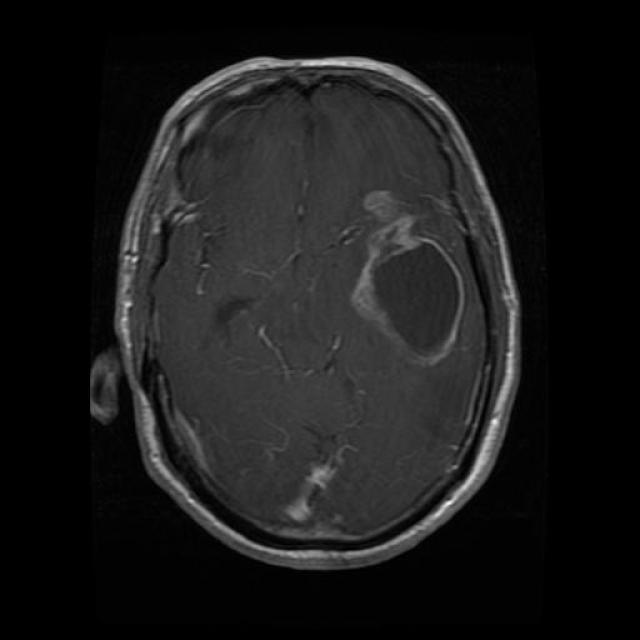

In [6]:
import random 
from PIL import Image

# Set Seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem
# print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

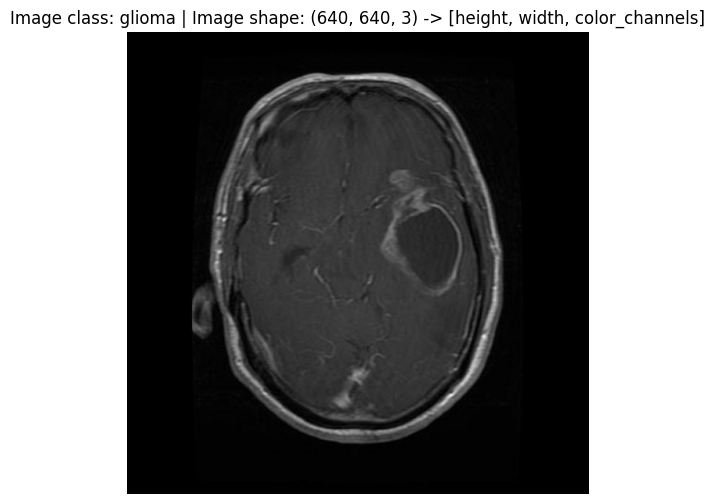

In [7]:
# Trying to visualize the image using matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_as_arr = np.array(img)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title(f"Image class: {image_class} | Image shape: {img_as_arr.shape} -> [height, width, color_channels]")
plt.axis("OFF");

In [8]:
img_as_arr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

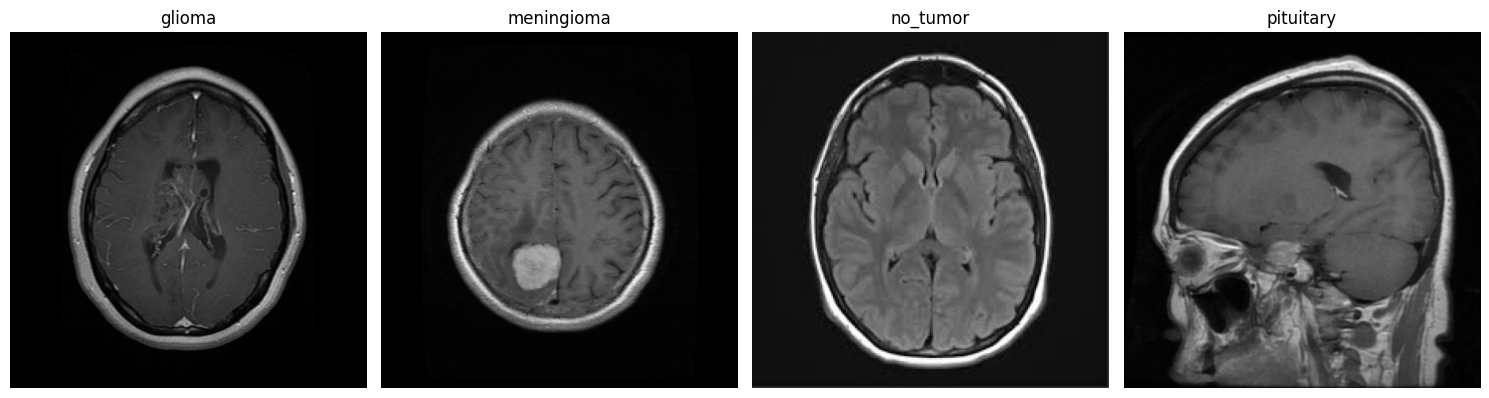

In [9]:
# Visualize each of the tumor types through matplotlib
from pathlib import Path
import random
import matplotlib.pyplot as plt
from PIL import Image

# Base path to your dataset
base_path = image_path / "train"

# Get all class directories under train (glioma, meningioma, pituitary, no_tumor)
class_dirs = [d for d in base_path.iterdir() if d.is_dir()]

# Create subplots: 1 row, len(class_dirs) columns
fig, axes = plt.subplots(1, len(class_dirs), figsize=(15, 10))

# Loop through each class folder
for ax, class_dir in zip(axes, class_dirs):
    # Get all image files inside the class folder
    image_files = list(class_dir.glob("*.jpg"))
    # Randomly choose one
    random_image = random.choice(image_files)
    # Open and display
    img = Image.open(random_image)
    ax.imshow(img)
    ax.set_title(class_dir.name)
    ax.axis("off")

plt.tight_layout()
plt.show()

# 2 Transforming data

In [10]:
import torchvision
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [11]:
data_transforms(img)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0039, 0.0078],
         [0.0078, 0.0118, 0.0118,  ..., 0.0118, 0.0078, 0.0118],
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0118, 0.0078],
         ...,
         [0.0157, 0.0157, 0.0196,  ..., 0.0118, 0.0157, 0.0235],
         [0.0118, 0.0157, 0.0118,  ..., 0.0118, 0.0118, 0.0196],
         [0.0000, 0.0039, 0.0000,  ..., 0.0118, 0.0078, 0.0118]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0039, 0.0078],
         [0.0078, 0.0118, 0.0118,  ..., 0.0118, 0.0078, 0.0118],
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0118, 0.0078],
         ...,
         [0.0157, 0.0157, 0.0196,  ..., 0.0118, 0.0157, 0.0235],
         [0.0118, 0.0157, 0.0118,  ..., 0.0118, 0.0118, 0.0196],
         [0.0000, 0.0039, 0.0000,  ..., 0.0118, 0.0078, 0.0118]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0039, 0.0078],
         [0.0078, 0.0118, 0.0118,  ..., 0.0118, 0.0078, 0.0118],
         [0.0118, 0.0157, 0.0157,  ..., 0.0118, 0.0118, 0.

In [12]:
data_transforms(img).shape

torch.Size([3, 64, 64])

In [13]:
img_as_arr.shape

(640, 640, 3)

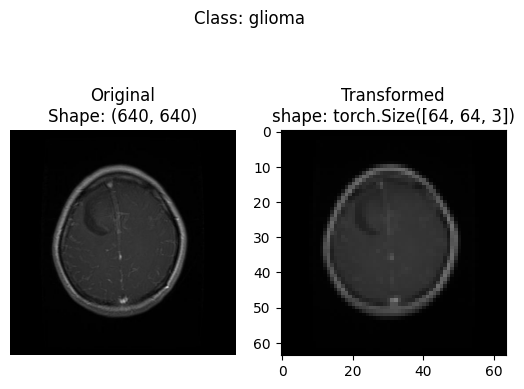

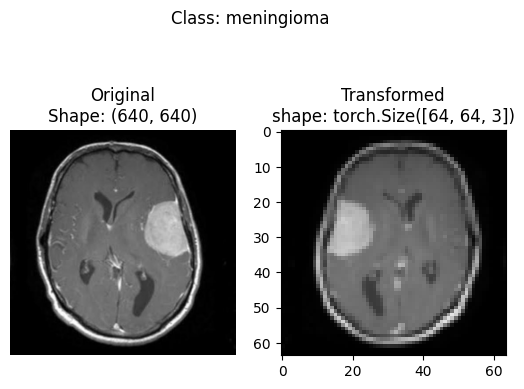

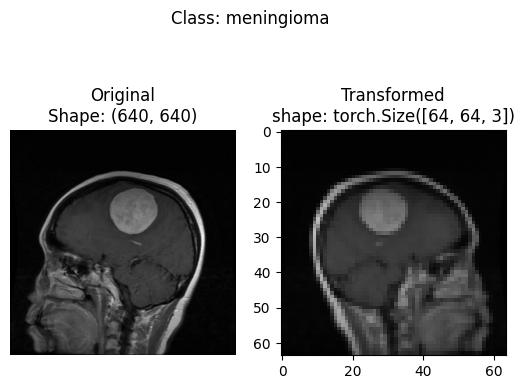

In [14]:
def plot_transformed_image(image_paths: list, transforms, k:int, seed=None):
    """
    Selects random images from a path of images and load/transforms
    them then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_path_list = random.sample(image_paths, k)
    for image_path in random_image_path_list:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nShape: {f.size}")
            ax[0].axis(False)
    
            transformed_image = transforms(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nshape: {transformed_image.shape}")
            ax[0].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}")
plot_transformed_image(image_path_list, data_transforms, 3, seed=42)

# 3. Loading Image Data using `ImageFolder`

In [15]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)

valid_data = datasets.ImageFolder(root=valid_dir,
                                  transform=data_transforms)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms)

train_data, valid_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1695
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 502
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\valid
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 246
     Root location: D:\Deepam\Projects\Brain Tumor MRI Classification\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalF

In [16]:
len(train_data),len(valid_data),len(test_data)

(1695, 502, 246)

In [17]:
class_names = train_data.classes
class_names

['glioma', 'meningioma', 'no_tumor', 'pituitary']

In [18]:
class_idx = train_data.class_to_idx
class_idx

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}

In [19]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [20]:
img, label = train_data[0]

print(f"image shape: {img.shape}")
print(f"image label: {label}")
print(f"image tensor: {img}")

image shape: torch.Size([3, 64, 64])
image label: 0
image tensor: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


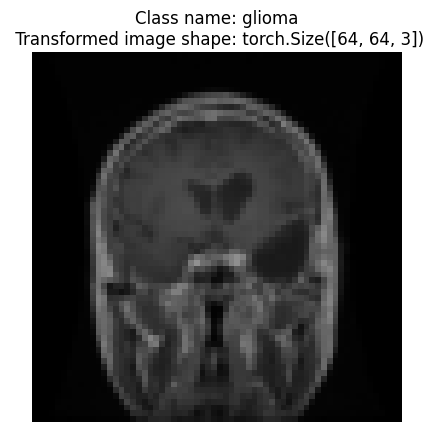

In [21]:
# visualizing the transformed iamge from train data
transformed_img = img.permute(1,2,0)

plt.imshow(transformed_img)
plt.title(f"Class name: {class_names[label]}\n Transformed image shape: {transformed_img.shape}")
plt.axis('off');

## 4.1 Turn Image or Dataset to DataLoaders

In [22]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = 4

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

valid_dataloader = DataLoader(dataset=valid_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)

len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(53, 16, 8)

In [23]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64])
Label shape: torch.Size([32])


In [24]:
from typing import List, Tuple, Dict

In [25]:
def display_random_images (dataset:torch.utils.data.dataset,
                           classes: List[str],
                           n: int = 5,
                           display_image: bool = True,
                           seed: int = None):

    if n > 10:
        n = 10
        print(f"Invalid input for n, n should be less than 10 in order to display image")
        display_image = False

    if seed:
        random.seed(seed)
    random_sample_idx = random.sample(range(len(dataset)), n)

    plt.figure(figsize=(16,8))

    for i, targ_sample in enumerate(random_sample_idx):
        targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_img_adjust = targ_img.permute(1,2,0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_img_adjust)
        plt.axis(False)
        if classes:
            title = f"Class name: {classes[targ_label]}"
            if display_image:
                title = title + f"\nShape: {targ_img_adjust.shape}"
        plt.title(title)

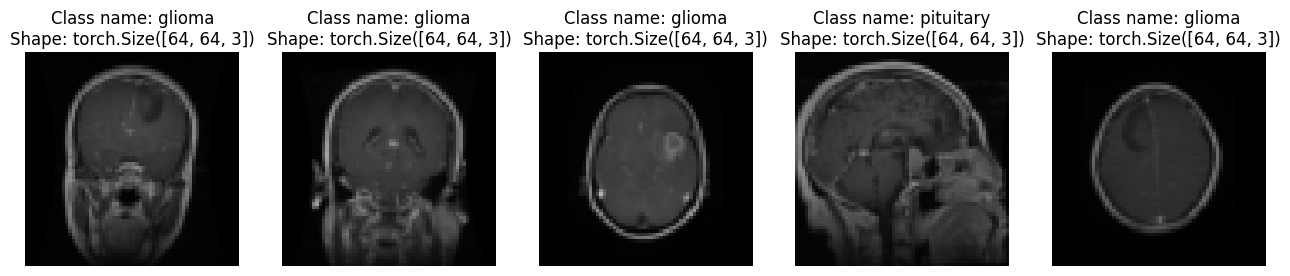

In [26]:
display_random_images(train_data, class_names, 5,42)

# 5 Model Building

In [27]:
# Setup device agnostic code
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [28]:
class CustomCNN(nn.Module):

    def __init__ (self,
                  input_shape:int,
                  hidden_units:int,
                  output_shape:int):

        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),

            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1, 
                      padding=0),
            
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2,
                         stride=2)
            
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape),
            
        )

    def forward(self, x):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.classifier(x)
        return x

In [29]:
custom_model_1 = CustomCNN(3, 10, len(class_names)).to(device)
custom_model_1

CustomCNN(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

## 5.1 Use `torchinfo` to get an idea of the shapes going through our model

In [30]:
# print summary of the model
from torchinfo import summary

In [31]:
summary(custom_model_1, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CustomCNN                                [32, 4]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## 5.3 Creating train and test loop

In [32]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):

    model.train()

    train_loss, train_acc = 0,0

    for X, y in dataloader:

        X = X.to(device)
        y = y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backpropagation
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # calculate the acc
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += ((y_pred_class == y).sum().item() / len(y_pred))

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

In [49]:
def test_step (model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device=device):

    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
    
            # 1. forward pass
            test_pred_logits = model(X)
    
            # 2. calculate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # test accuracy calculation
            test_pred_class = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += ((test_pred_class==y).sum().item() / len(test_pred_class))

        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)

        return test_loss, test_acc

## 5.4 Combining train and test loop

In [50]:
from tqdm.auto import tqdm

def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,   # NON-DEFAULT
    device=device, 
    loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
    epochs: int = 5
):

    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
              }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=valid_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [51]:
from timeit import default_timer as timer

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

custom_model_1 = CustomCNN(3, 10, len(class_names)).to(device)

epochs = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=custom_model_1.parameters(),
                             lr = 0.001)
start_time = timer()

custom_model_1_results = train(custom_model_1,
                               train_dataloader = train_dataloader,
                               test_dataloader = valid_dataloader,
                               optimizer=optimizer,
                               loss_fn=loss_fn,
                               epochs=epochs)

end_time = timer()

total_time = end_time - start_time
print(f"Total time take {total_time:.3f} seconds")

  5%|▌         | 1/20 [00:30<09:46, 30.86s/it]

Epoch: 1 | Train Loss: 1.2712 | Train acc: 0.4054 | Test Loss: 1.0251 | Test acc: 0.5504


 10%|█         | 2/20 [01:00<09:03, 30.19s/it]

Epoch: 2 | Train Loss: 0.9136 | Train acc: 0.6200 | Test Loss: 0.8280 | Test acc: 0.6577


 15%|█▌        | 3/20 [01:30<08:32, 30.15s/it]

Epoch: 3 | Train Loss: 0.7552 | Train acc: 0.7151 | Test Loss: 0.7018 | Test acc: 0.7191


 20%|██        | 4/20 [01:59<07:56, 29.80s/it]

Epoch: 4 | Train Loss: 0.6325 | Train acc: 0.7611 | Test Loss: 0.5928 | Test acc: 0.7729


 25%|██▌       | 5/20 [02:28<07:19, 29.29s/it]

Epoch: 5 | Train Loss: 0.5678 | Train acc: 0.7923 | Test Loss: 0.6110 | Test acc: 0.7550


 30%|███       | 6/20 [02:57<06:48, 29.18s/it]

Epoch: 6 | Train Loss: 0.5445 | Train acc: 0.7970 | Test Loss: 0.5858 | Test acc: 0.7619


 35%|███▌      | 7/20 [03:27<06:22, 29.42s/it]

Epoch: 7 | Train Loss: 0.5231 | Train acc: 0.8013 | Test Loss: 0.5929 | Test acc: 0.7667


 40%|████      | 8/20 [03:56<05:54, 29.53s/it]

Epoch: 8 | Train Loss: 0.5036 | Train acc: 0.8206 | Test Loss: 0.5640 | Test acc: 0.7960


 45%|████▌     | 9/20 [04:26<05:24, 29.53s/it]

Epoch: 9 | Train Loss: 0.4698 | Train acc: 0.8389 | Test Loss: 0.5566 | Test acc: 0.7823


 50%|█████     | 10/20 [04:55<04:54, 29.46s/it]

Epoch: 10 | Train Loss: 0.4715 | Train acc: 0.8312 | Test Loss: 0.6214 | Test acc: 0.7832


 55%|█████▌    | 11/20 [05:26<04:27, 29.71s/it]

Epoch: 11 | Train Loss: 0.4540 | Train acc: 0.8402 | Test Loss: 0.5315 | Test acc: 0.8175


 60%|██████    | 12/20 [05:55<03:57, 29.63s/it]

Epoch: 12 | Train Loss: 0.4561 | Train acc: 0.8443 | Test Loss: 0.5312 | Test acc: 0.7853


 65%|██████▌   | 13/20 [06:25<03:27, 29.58s/it]

Epoch: 13 | Train Loss: 0.4259 | Train acc: 0.8466 | Test Loss: 0.5114 | Test acc: 0.8029


 70%|███████   | 14/20 [06:54<02:57, 29.54s/it]

Epoch: 14 | Train Loss: 0.4071 | Train acc: 0.8584 | Test Loss: 0.5447 | Test acc: 0.8038


 75%|███████▌  | 15/20 [07:23<02:26, 29.31s/it]

Epoch: 15 | Train Loss: 0.4210 | Train acc: 0.8513 | Test Loss: 0.5031 | Test acc: 0.8166


 80%|████████  | 16/20 [07:51<01:56, 29.13s/it]

Epoch: 16 | Train Loss: 0.4023 | Train acc: 0.8555 | Test Loss: 0.4997 | Test acc: 0.8253


 85%|████████▌ | 17/20 [08:20<01:27, 29.03s/it]

Epoch: 17 | Train Loss: 0.3895 | Train acc: 0.8619 | Test Loss: 0.4896 | Test acc: 0.8294


 90%|█████████ | 18/20 [08:49<00:57, 28.97s/it]

Epoch: 18 | Train Loss: 0.3653 | Train acc: 0.8767 | Test Loss: 0.4944 | Test acc: 0.8194


 95%|█████████▌| 19/20 [09:17<00:28, 28.68s/it]

Epoch: 19 | Train Loss: 0.3689 | Train acc: 0.8608 | Test Loss: 0.5035 | Test acc: 0.8194


100%|██████████| 20/20 [09:48<00:00, 29.43s/it]

Epoch: 20 | Train Loss: 0.3678 | Train acc: 0.8743 | Test Loss: 0.4720 | Test acc: 0.8216
Total time take 588.563 seconds


In [53]:
custom_model_1_results

{'train_loss': [1.2712198135987767,
  0.9135621414994294,
  0.7552349027597679,
  0.6325193255577447,
  0.5678199439678552,
  0.5445447153640244,
  0.5231443005350401,
  0.5036299031860424,
  0.4698417611279578,
  0.4714634840218526,
  0.4540463716916318,
  0.4561200364018386,
  0.42594211646970714,
  0.4071165112391958,
  0.42104566743913685,
  0.4022921110099217,
  0.3895197758134806,
  0.3653208543107195,
  0.36887106749246706,
  0.3677548350028272],
 'train_acc': [0.40535605599513086,
  0.6199977175897748,
  0.7150601034692635,
  0.7610887096774194,
  0.7923196895922093,
  0.7970366707242849,
  0.8012591296409008,
  0.8206215763846622,
  0.8389379184418746,
  0.831234783931832,
  0.8401932440657335,
  0.8443206025562995,
  0.8466410529519173,
  0.8583574254412659,
  0.8513009738283627,
  0.8555044126597687,
  0.8619141813755326,
  0.8766547474132684,
  0.8607919963481437,
  0.8742772367620206],
 'test_loss': [1.0250606052577496,
  0.8279662122949958,
  0.7017652243375778,
  0.59279

## 5.5 Plot the loss curves of Model 0

In [54]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a results dictionary."""
    # Get the loss values of the results dictionary(training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15,7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

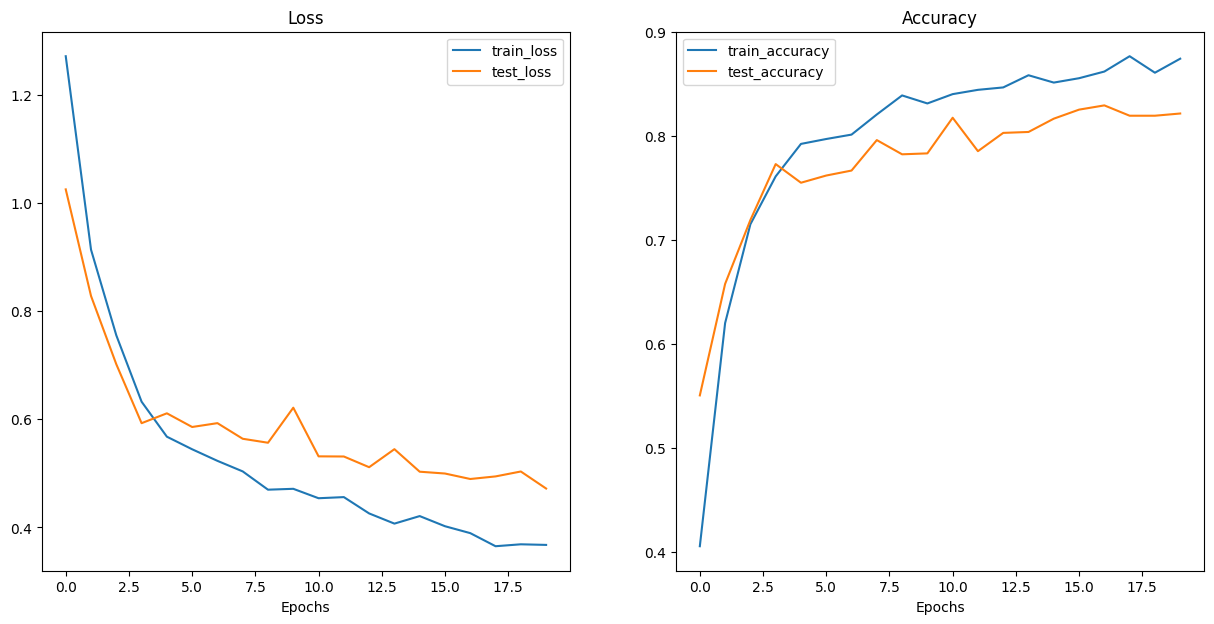

In [55]:
plot_loss_curves(custom_model_1_results)